In [98]:
from pathlib import Path
import re
import pandas as pd
import numpy as np
import shutil
import seaborn as sns

In [3]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/20240218_PhaseDiagramSpringVsRestLengthCondensateMovesSeedHighRes")

In [19]:
kt = re.compile("_kt_(.+?)_")
rl = re.compile("_rl_(.+?)_")

In [93]:
lst = []
for i in folder.glob("M1*"):
    kt_0 = np.float64(kt.findall(i.as_posix())[0])
    rl_0 = np.float64(rl.findall(i.as_posix())[0])
    lst.append((kt_0, rl_0, 1))

In [94]:
df = pd.DataFrame(lst)
df.columns = ["kt", "rl", "values"]

In [95]:
pt = pd.pivot_table(df, columns="kt", index="rl", values="values")

<Axes: xlabel='kt', ylabel='rl'>

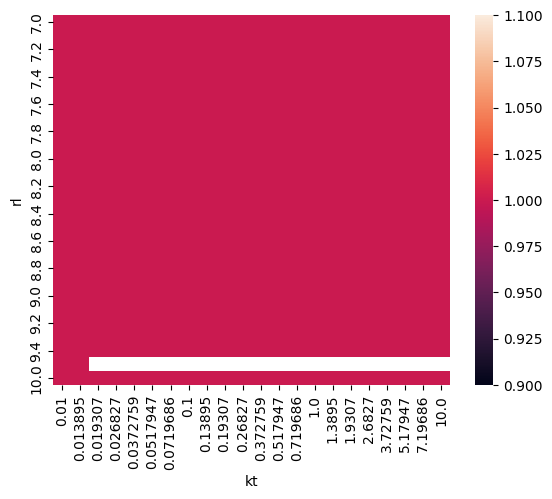

In [99]:
sns.heatmap(pt)

In [91]:
for i in folder.glob("M1*"):
    if (not (i / "movies").exists()) and i.is_dir():
        shutil.rmtree(i.as_posix())